In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
path_to_data = "../data/1002_quantification.csv"
df = pd.read_csv(path_to_data)
df = df.sample(frac=0.1, random_state=0).reset_index(drop=True)

## QC STEPS

what are the key qc steps I should do?
1. Segmentation artefacts: Too little, too large, too eccentric?
2. 

## Delete too small or too large segmentation masks

In [114]:
# label all rows for which the value is less than 1%
df['Area_bot001'] = df['Area'] < df['Area'].quantile(0.01)
df['Area_top001'] = df['Area'] > df['Area'].quantile(0.99)

print(f"Number of rows with Area < 1%: {df['Area_bot001'].sum()}")
print(f"Number of rows with Area > 1%: {df['Area_top001'].sum()}")

Number of rows with Area < 1%: 1644
Number of rows with Area > 1%: 1657


In [115]:
sample_10_too_large = df[df['Area_top001'] == True].sample(10)
sample_10_too_little = df[df['Area_bot001'] == True].sample(10)

In [117]:
sample_10_too_large.head()[['X_centroid','Y_centroid']]

,X_centroid,Y_centroid
157381,15286.307692,13781.843389
64520,27053.101084,27537.880102
105671,76017.939122,10668.551426
85084,58947.209856,47533.947781
108398,13144.251546,15794.052066


In [119]:
df.columns

Index(['CellID', 'std_750_bg', 'std_647_bg', 'std_555_bg', 'std_488_bg',
       'std_DAPI_bg', 'std_Vimentin', 'std_CD3e', 'std_panCK', 'std_CD8',
       'std_DAPI_1', 'std_COL1A1', 'std_CD20', 'std_CD68', 'std_Ki67',
       'std_DAPI_2', 'mean_750_bg', 'mean_647_bg', 'mean_555_bg',
       'mean_488_bg', 'mean_DAPI_bg', 'mean_Vimentin', 'mean_CD3e',
       'mean_panCK', 'mean_CD8', 'mean_DAPI_1', 'mean_COL1A1', 'mean_CD20',
       'mean_CD68', 'mean_Ki67', 'mean_DAPI_2', 'quantile25_750_bg',
       'quantile25_647_bg', 'quantile25_555_bg', 'quantile25_488_bg',
       'quantile25_DAPI_bg', 'quantile25_Vimentin', 'quantile25_CD3e',
       'quantile25_panCK', 'quantile25_CD8', 'quantile25_DAPI_1',
       'quantile25_COL1A1', 'quantile25_CD20', 'quantile25_CD68',
       'quantile25_Ki67', 'quantile25_DAPI_2', 'quantile50_750_bg',
       'quantile50_647_bg', 'quantile50_555_bg', 'quantile50_488_bg',
       'quantile50_DAPI_bg', 'quantile50_Vimentin', 'quantile50_CD3e',
       'quantile50_pa

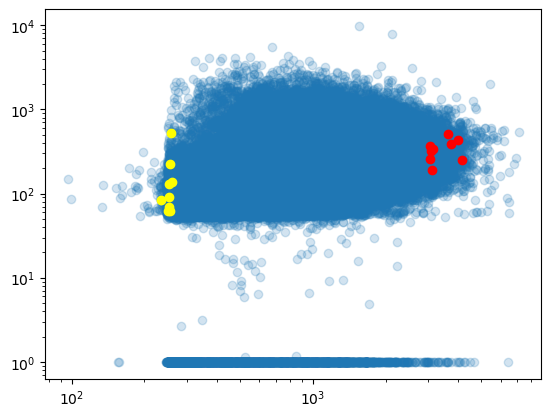

In [132]:
tmp_df = df + 1
plt.scatter(data=tmp_df, x="Area", y="mean_DAPI_1", alpha=0.2)
#plot red dots for the 10% smallest and largest values
plt.scatter(data=sample_10_too_large, x="Area", y="mean_DAPI_1", color='red')
plt.scatter(data=sample_10_too_little, x="Area", y="mean_DAPI_1", color='yellow')
plt.xscale('log')
plt.yscale('log')
plt.show()

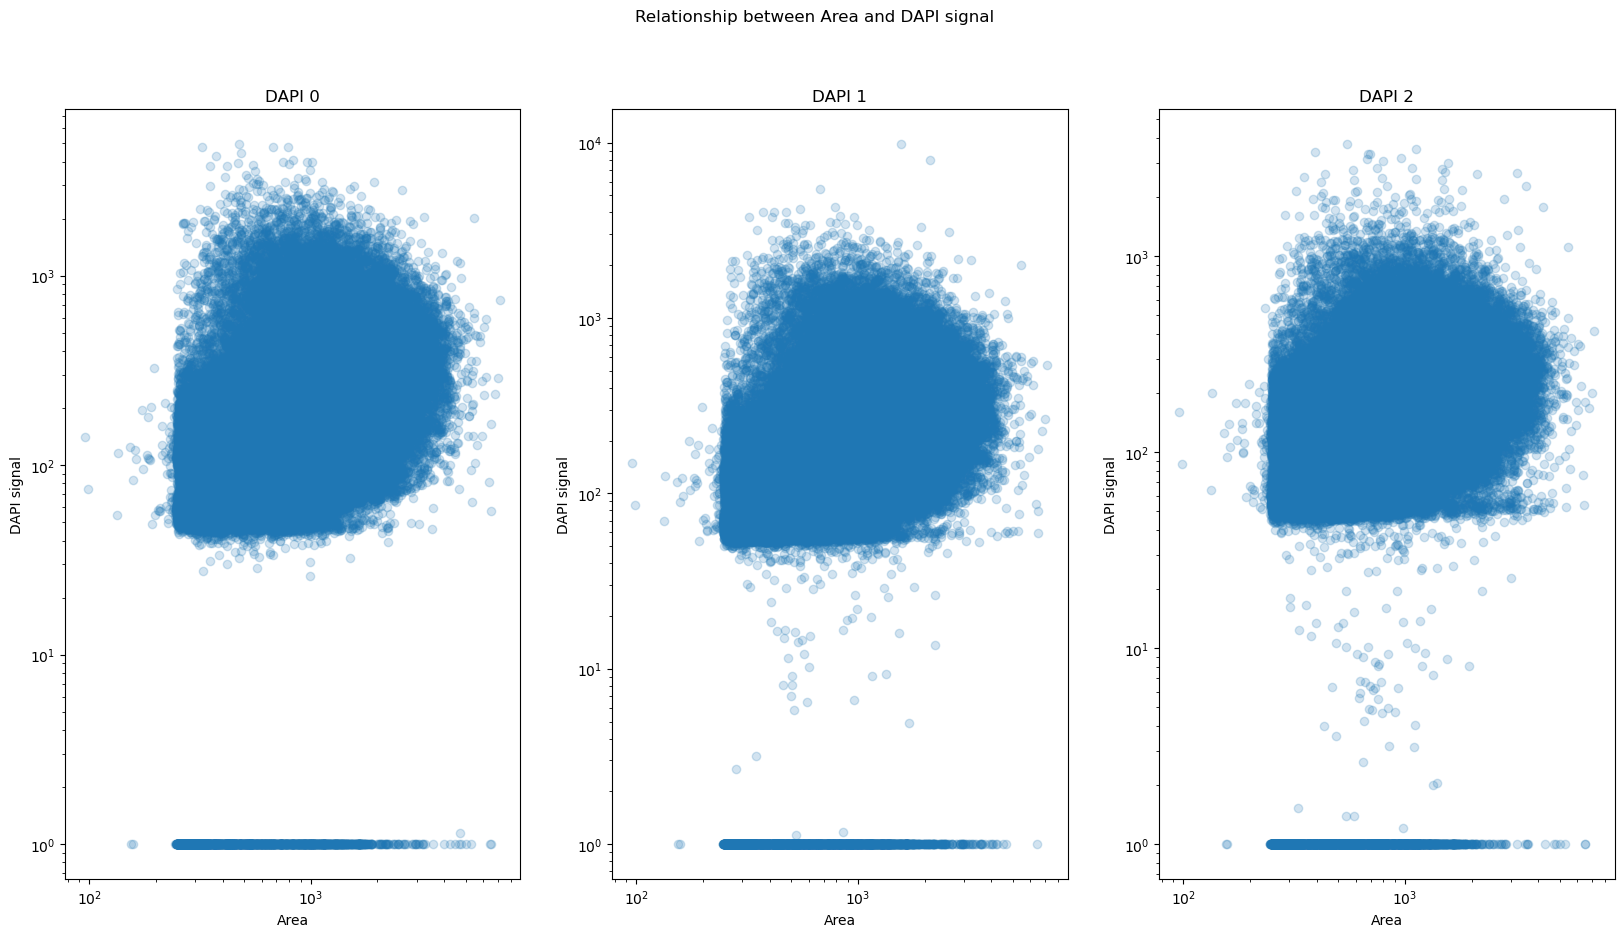

In [141]:
# relationship between Area and DAPI signal

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes[0].scatter(data=tmp_df, x="Area", y="mean_DAPI_bg", alpha=0.2)
axes[1].scatter(data=tmp_df, x="Area", y="mean_DAPI_1", alpha=0.2)
axes[2].scatter(data=tmp_df, x="Area", y="mean_DAPI_2", alpha=0.2)

for i,ax in enumerate(axes):

    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].set_title(f"DAPI {i}")
    axes[i].set_xlabel("Area")
    axes[i].set_ylabel("DAPI signal")



fig.suptitle("Relationship between Area and DAPI signal")

# plt.title("Relationship between Area and DAPI signal")
plt.show()

In [142]:
DAPI_related_columns = [col for col in df.columns if "DAPI" in col]

In [143]:
DAPI_related_columns

['std_DAPI_bg',
 'std_DAPI_1',
 'std_DAPI_2',
 'mean_DAPI_bg',
 'mean_DAPI_1',
 'mean_DAPI_2',
 'quantile25_DAPI_bg',
 'quantile25_DAPI_1',
 'quantile25_DAPI_2',
 'quantile50_DAPI_bg',
 'quantile50_DAPI_1',
 'quantile50_DAPI_2',
 'quantile75_DAPI_bg',
 'quantile75_DAPI_1',
 'quantile75_DAPI_2']

/var/folders/x7/grkjlk8s223dy6234rnz1885mxz2_6/T/ipykernel_13279/742669255.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[i, j].set_ylim(0, 5000)


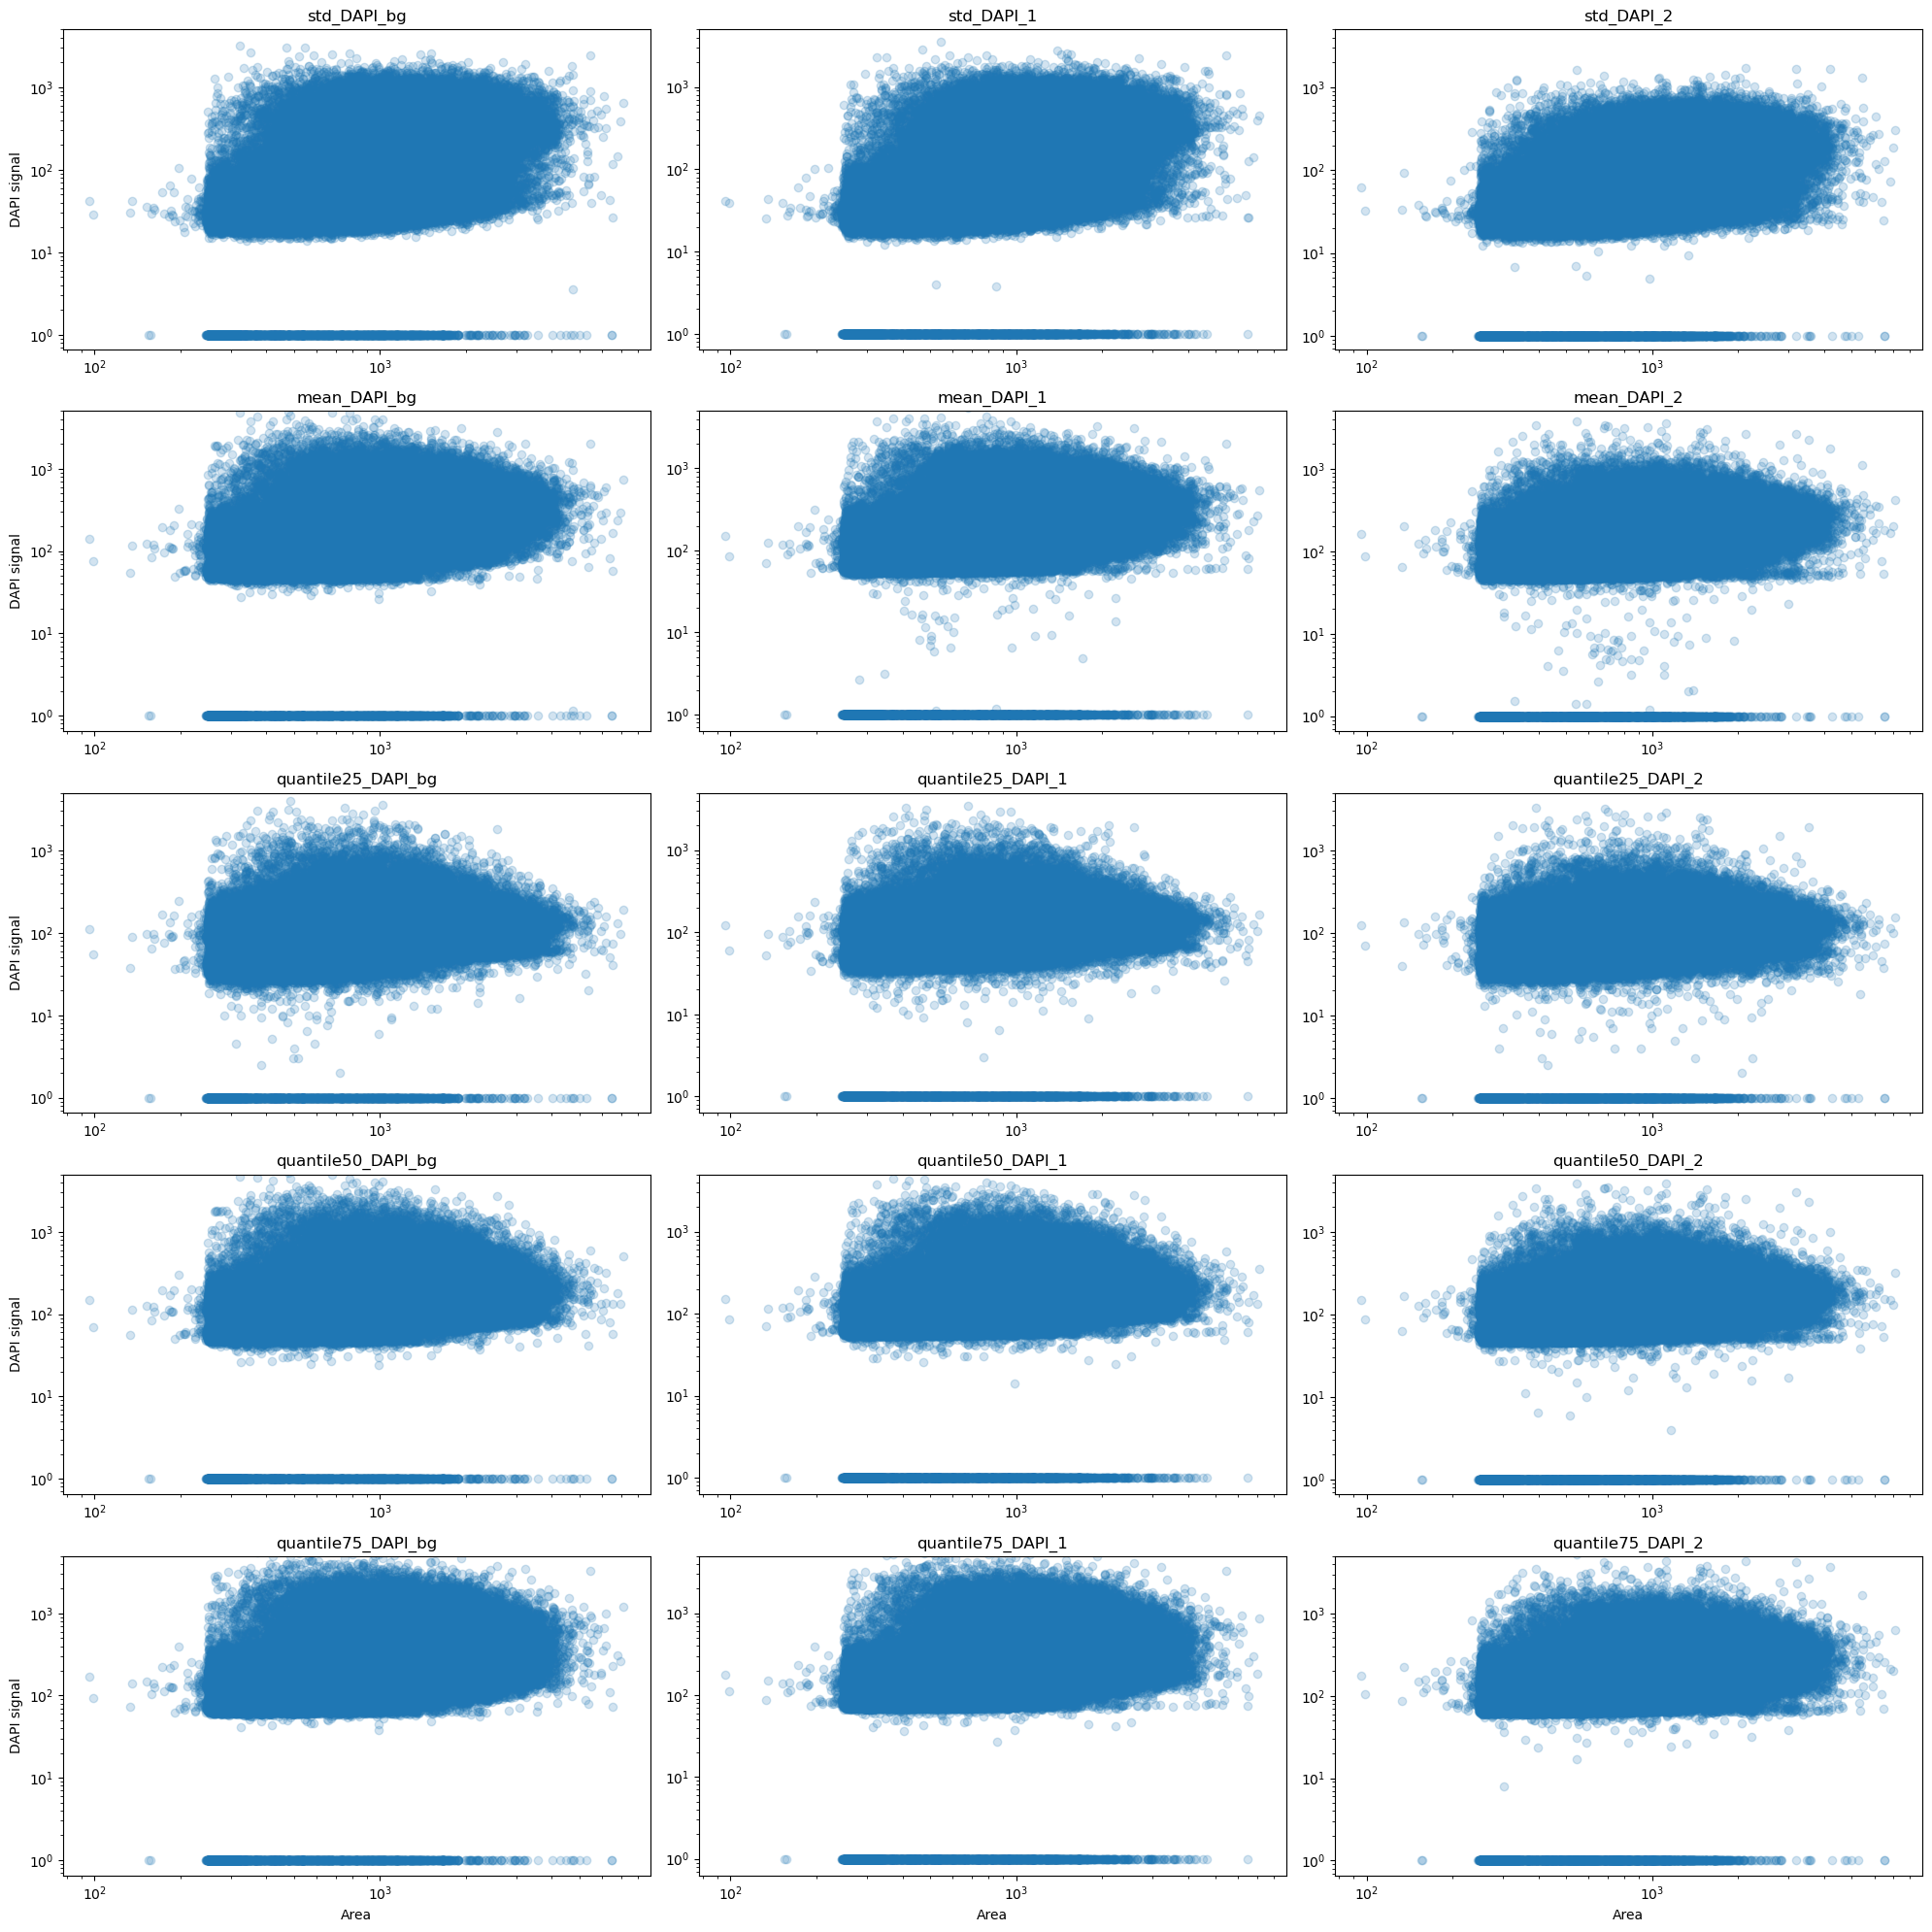

In [150]:
#plot the relationship between Area and all DAPI signals
fig, axes = plt.subplots(5, 3, figsize=(20, 20))

for i, col in enumerate(DAPI_related_columns):
    axes[i//3, i%3].scatter(data=tmp_df, x="Area", y=col, alpha=0.2)
    axes[i//3, i%3].set_xscale('log')
    axes[i//3, i%3].set_yscale('log')
    axes[i//3, i%3].set_title(col)

#fig x axis
for i in range(3):
    axes[4, i].set_xlabel("Area")
#fig y axis
for i in range(5):
    axes[i, 0].set_ylabel("DAPI signal")

#same y axis for each row
for i in range(5):
    for j in range(3):
        axes[i, j].set_ylim(0, 5000)

plt.tight_layout()
plt.show()

In [151]:
df['std_DAPI_bg'].describe()

count    165883.000000
mean        125.667567
std         200.005693
min           0.000000
25%          27.358326
50%          35.922285
75%         101.934437
max        3145.372567
Name: std_DAPI_bg, dtype: float64

In [153]:
df.sample(10)[DAPI_related_columns]

,std_DAPI_bg,std_DAPI_1,std_DAPI_2,mean_DAPI_bg,mean_DAPI_1,mean_DAPI_2,quantile25_DAPI_bg,quantile25_DAPI_1,quantile25_DAPI_2,quantile50_DAPI_bg,quantile50_DAPI_1,quantile50_DAPI_2,quantile75_DAPI_bg,quantile75_DAPI_1,quantile75_DAPI_2
48519,0.000000,0.000000,27.502886,0.000000,0.000000,48.635316,0.0,0.00,30.00,0.0,0.0,49.0,0.00,0.00,68.00
162923,18.618137,27.796135,24.521692,54.135458,64.980080,54.760956,41.0,46.50,37.00,52.0,65.0,55.0,66.00,85.00,71.00
140459,244.399072,310.934755,65.484768,382.489681,428.020638,165.016260,177.5,180.50,117.00,299.0,295.0,155.0,548.00,625.00,204.50
126956,211.092713,192.489816,59.930940,383.660028,347.842105,141.480797,189.0,175.50,101.00,355.0,312.0,127.0,574.00,512.00,165.00
85604,24.761928,29.692544,19.026456,64.264770,79.328228,63.371991,48.0,60.00,51.00,65.0,76.0,63.0,79.00,96.00,76.00
165336,384.034829,264.032024,311.788773,856.761105,752.224269,545.140845,527.0,555.25,299.25,849.0,776.0,417.0,1123.75,958.75,772.75
154335,64.839956,49.866791,45.549942,151.839858,162.170819,148.377224,106.0,127.00,115.00,139.0,152.0,145.0,182.00,191.00,178.00
103912,23.631621,29.877441,26.020373,60.449749,81.396985,73.763819,46.0,61.00,56.25,61.0,80.5,73.5,77.00,100.00,90.00
20943,41.327531,55.970232,52.442512,94.361355,129.271016,124.518193,63.0,88.00,83.00,88.0,121.0,119.0,121.00,168.00,165.00
35955,36.692324,24.231417,38.789934,121.611276,123.451039,127.477745,94.0,107.00,100.00,123.0,123.0,127.0,145.00,139.00,150.00


In [177]:
#plot all values of DAPI signals for a single row
rows10 = df.sample(20)[DAPI_related_columns]
#transpose the dataframe
rows = rows10.T
#add column based on the first word of the index
#add column based on the last word of the index
rows['math'] = rows.index.str.split('_').str[0]
rows['cycle'] = rows.index.str.split('_').str[-1]

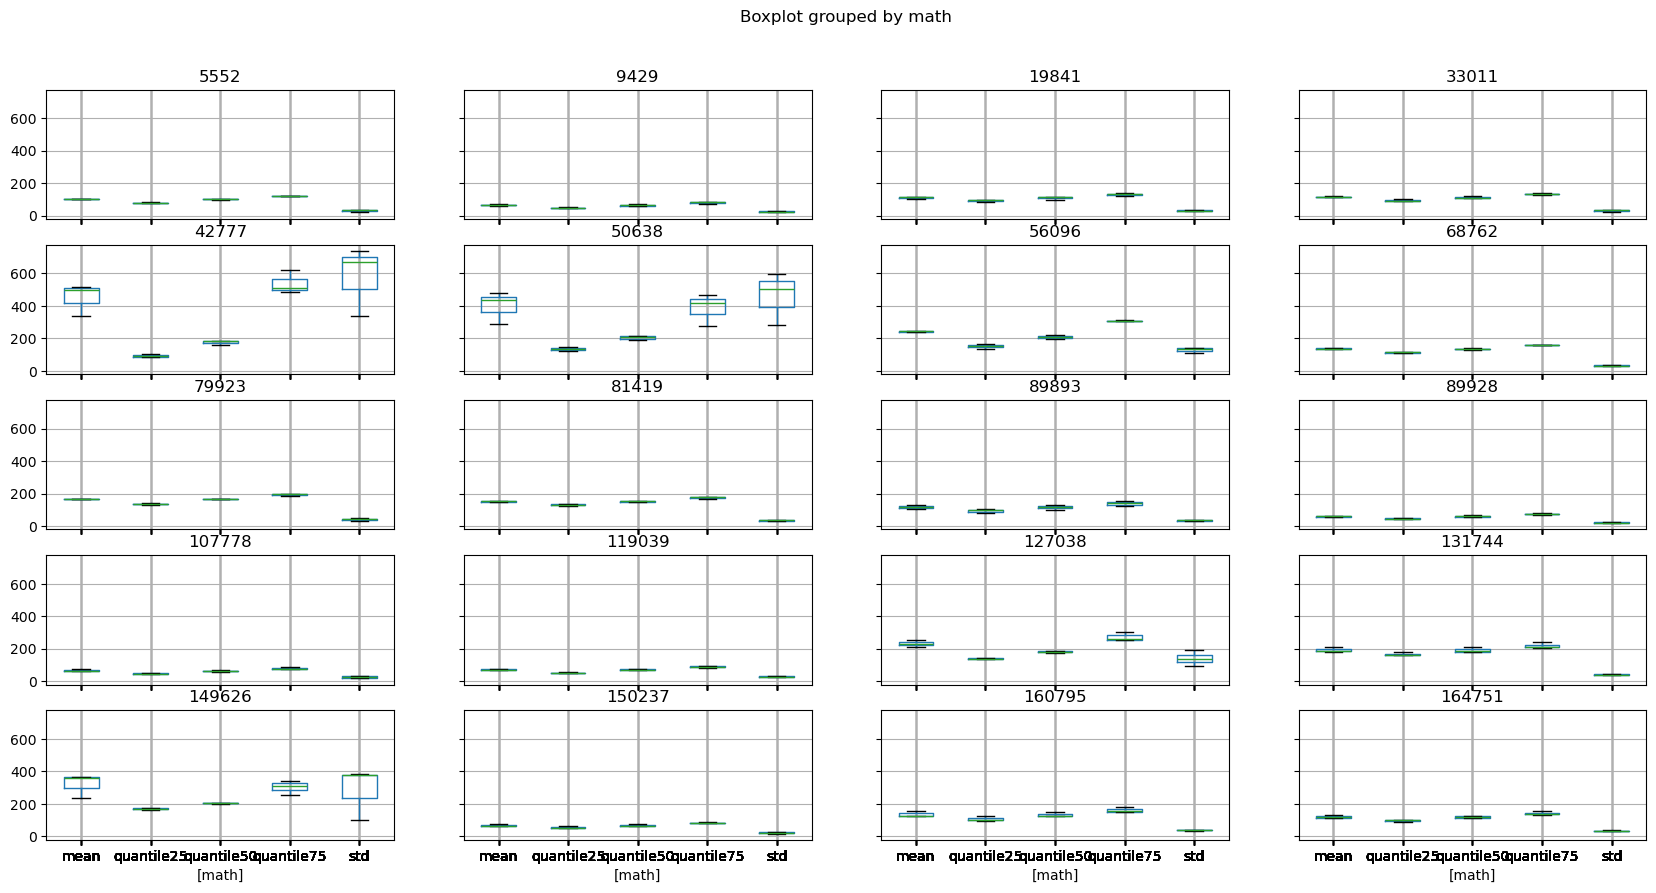

In [179]:
#plot scatter plot grouped by cycle
rows.boxplot(by='math', figsize=(20, 10))
plt.show()

In [180]:
df.shape

(165883, 87)

In [182]:
df[DAPI_related_columns].describe()

,std_DAPI_bg,std_DAPI_1,std_DAPI_2,mean_DAPI_bg,mean_DAPI_1,mean_DAPI_2,quantile25_DAPI_bg,quantile25_DAPI_1,quantile25_DAPI_2,quantile50_DAPI_bg,quantile50_DAPI_1,quantile50_DAPI_2,quantile75_DAPI_bg,quantile75_DAPI_1,quantile75_DAPI_2
count,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000,165883.000000
mean,125.667567,118.663624,75.711835,199.826869,199.542824,157.543829,109.367639,114.589837,104.395924,161.684118,164.260856,139.765220,261.514825,257.401764,195.429987
std,200.005693,189.036727,95.678331,234.298850,223.893553,138.320201,105.822110,103.645511,83.941731,186.136327,178.818929,118.494427,344.399567,327.086926,185.294666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.358326,28.281814,27.248297,62.648004,72.523395,64.033971,45.000000,54.000000,46.000000,62.000000,71.000000,63.000000,80.000000,90.000000,81.000000
50%,35.922285,36.721280,35.649708,119.978000,125.998649,121.955916,92.000000,97.000000,93.000000,116.000000,122.000000,117.000000,142.000000,149.000000,144.000000
75%,101.934437,97.052650,79.025911,222.676284,220.988948,199.258054,135.000000,139.000000,135.000000,180.000000,183.000000,173.000000,260.875000,258.750000,233.250000
max,3145.372567,5875.373418,1717.910747,4942.791579,9814.004493,3723.816514,3932.250000,8191.000000,3266.000000,5241.000000,10390.000000,3911.000000,7449.500000,13980.500000,5185.000000


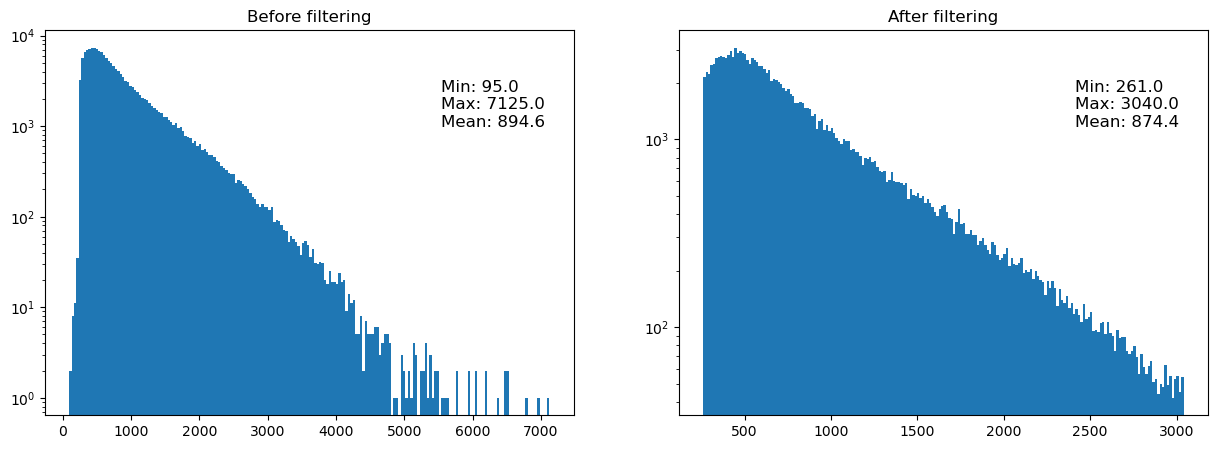

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(df["Area"], bins=200, log=True)
axes[0].text(0.75, 0.75, "Min: {}\nMax: {}\nMean: {}".format(df["Area"].min(), df["Area"].max(), f"{df['Area'].mean():.4g}"), fontsize=12, transform=axes[0].transAxes)
axes[0].set_title("Before filtering")
axes[1].hist(df_1["Area"], bins=200, log=True)
axes[1].text(0.75, 0.75, "Min: {}\nMax: {}\nMean: {}".format(df_1["Area"].min(), df_1["Area"].max(), f"{df_1['Area'].mean():.4g}"), fontsize=12, transform=axes[1].transAxes)
axes[1].set_title("After filtering")
plt.show()

## Delete cells that do not have enough DAPI

In [ ]:
#filter both bottom 1% and top 1% of Area values
before = df.shape[0]
df_1 = df[(df["Area"] > df["Area"].quantile(0.01)) & (df["Area"] < df["Area"].quantile(0.99))]
after = df_1.shape[0]
print(f"Filtered out {before - after} rows")

# Functions

In [78]:
!pip install logger

  Preparing metadata (setup.py) ... done
  Created wheel for logger: filename=logger-1.4-py3-none-any.whl size=1759 sha256=1119e0c92860eeccc6f7a8fdc5a9c01d4463157bcbca22d7f746e5561a1ecdd2
  Stored in directory: /Users/jnimoca/Library/Caches/pip/wheels/fb/19/7b/09fc73f7503166eaf7f31b4aa0095b7f78af2ec0898e1f8312
Successfully built logger


In [80]:
# plot cell from large image based on x,y coordinates
import matplotlib.pyplot as plt
import tifffile
import time
from loguru import logger
import sys

logger.remove()
logger.add(sys.stdout, format="<green>{time:HH:mm:ss.SS}</green> | <level>{level}</level> | {message}")

path_to_image = "/Volumes/ag_coscia/Jose/P26_BCCN/P26E04_rerun_990_1002/1002_m150_s2/background/1002_m150_s2_backsub.ome.tif"
path_to_subset = "/Users/jnimoca/Jose_BI/data/P12_napari_gating_plugin/dearray/1.ome.tif"

# this could take in pixel size
def create_crop_from_xy(x,y):
    crop = [x-50, x+50, y-50, y+50]
    return crop

def plot_cell(image_path, x,y, channel:int=4):

    start_time = time.time()

    # create crop
    crop = create_crop_from_xy(x,y)
    logger.info("crop created")

    with tifffile.TiffFile(image_path) as tif:
        cell_box = tif.asarray(key=channel)[crop[0]:crop[1],crop[2]:crop[3]]
        plt.imshow(cell_box)
    

    # plotting the image
    # remove xticks and yticks
    plt.xticks([])
    plt.yticks([])
    plt.show()

    print("--- %s seconds ---" % (time.time() - start_time))

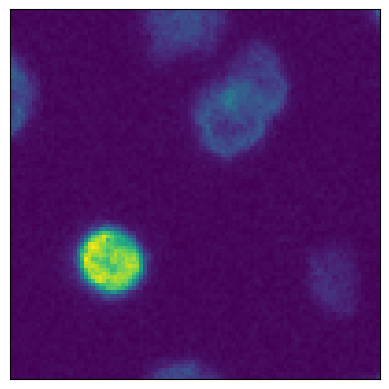

--- 0.09505605697631836 seconds ---


In [75]:
plot_cell(path_to_subset, 3450, 3450)

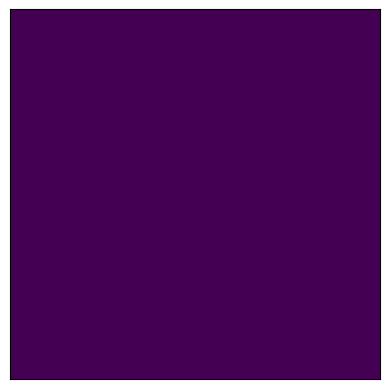

--- 96.94631171226501 seconds ---


In [76]:
plot_cell(path_to_image, 3450, 3450)

## describe ome tif 

In [69]:
import tifffile

def describe_ome_tif(file_path, print_XML=False):
    # Open the OME-TIFF file
    with tifffile.TiffFile(file_path) as tif:
        # Basic file information
        print(f"File: {file_path}")
        print(f"Number of pages: {len(tif.pages)}")
        
        # OME Metadata
        if print_XML:
            ome_metadata = tif.ome_metadata
            if ome_metadata:
                print("\nOME Metadata:")
                print(ome_metadata)
        
        # Image Series Information
        print("\nImage Series Information:")
        for series in tif.series:
            print(f"Series {series.index}:")
            print(f"  Shape: {series.shape}")
            print(f"  Data type: {series.dtype}")
            print(f"  Axes: {series.axes}")
            if series.is_pyramidal:
                print(f"  Pyramidal levels: {len(series.levels)}")
                for level, level_series in enumerate(series.levels):
                    print(f"    Level {level}: Shape: {level_series.shape}")
            

# Example usage
# describe_ome_tif(path_to_subset)